In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from ball_helper import add_ball_middle, create_circle_tensor, tensor_to_pil, depth_prediction, inpaint_chromeball, ball_center_crop
from PIL import Image

In [3]:
image = Image.open("../../datasets/face/face2000_single/images/00000/00001.png").resize((512,512))

In [4]:
print(image)

<PIL.Image.Image image mode=RGB size=512x512 at 0x7F6D40CB84D0>


In [5]:
output_image = inpaint_chromeball(image)

/home/vll/venv_pytorch2.0/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/vll/venv_pytorch2.0/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Couldn't connect to the Hub: 404 Client Error. (Request ID: Root=1-66d7cefa-3e35a12525ca6c702041a27f;52f88447-28c6-4f08-a0a5-4c3d28ae3757)

Repository Not Found for url: https://huggingface.co/api/models/runwayml/stable-diffusion-v1-5.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you a

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_inpaint.StableDiffusionControlNetInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

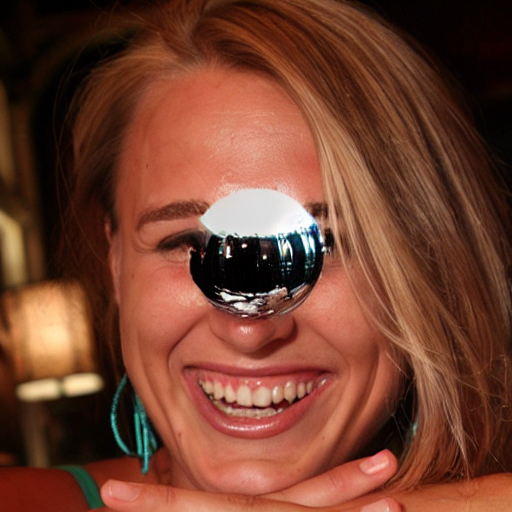

In [10]:
display(output_image)

In [ ]:
depth = depth_prediction(image)

/home/vll/venv_pytorch2.0/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


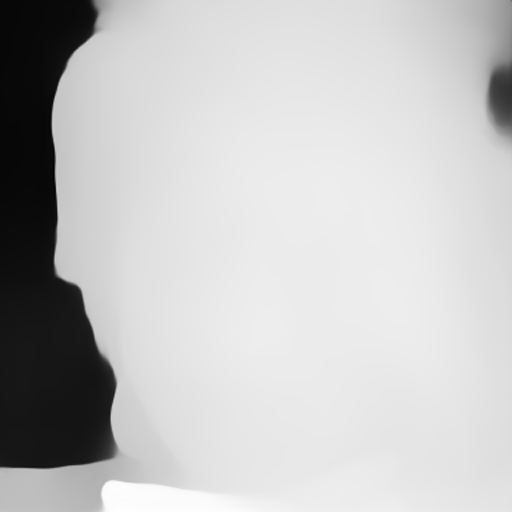

In [ ]:
display(depth)

In [7]:
mask = create_circle_tensor(512,128)

/home/vll/venv_pytorch2.0/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
mask = tensor_to_pil(mask)

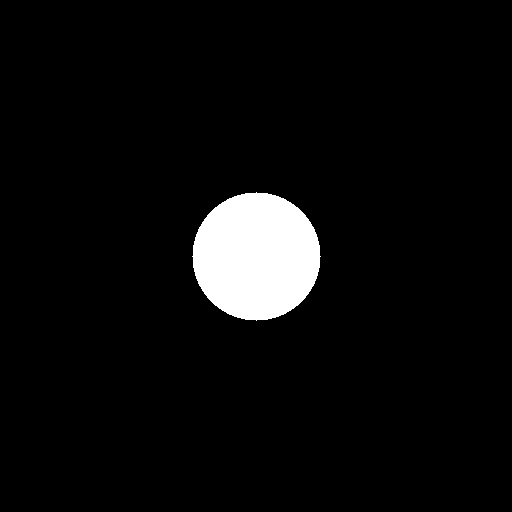

In [8]:
mask

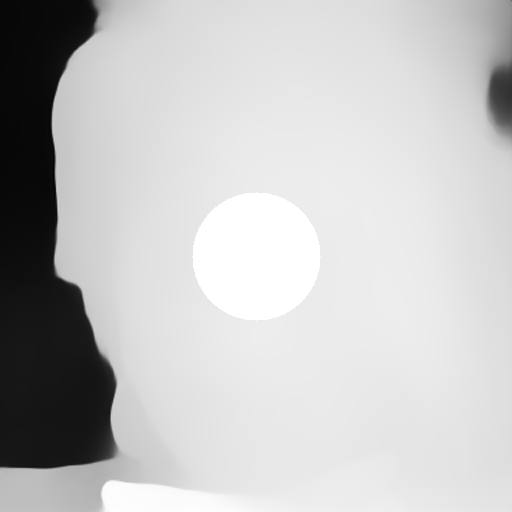

In [9]:
add_ball_middle(depth, mask)

add_ball_middle(image, mask)